# link = https://drive.google.com/drive/folders/1_UxBDEDekgHBKg-8mYgdTEIRiYRqw_S6

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Only need the tweets and associated sentiment
tweets_df = pd.read_csv("C:\\Users\Omar Derb\\ipynb\\sentiment\\tweet-sentiment-extraction\\train.csv")
tweets_df = tweets_df[['text', 'sentiment']]

test_df = pd.read_csv("C:\\Users\Omar Derb\\ipynb\\sentiment\\tweet-sentiment-extraction\\test.csv")
test_df = test_df[['text', 'sentiment']]

In [3]:
len(test_df)

3534

In [4]:
temp = tweets_df.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='CMRmap_r')

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='sentiment', ylabel='count'>

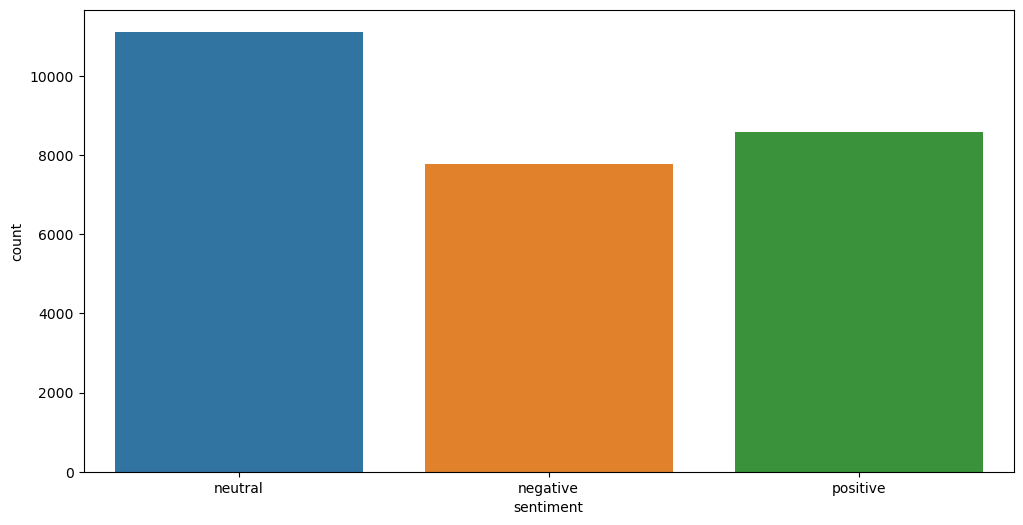

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=tweets_df)

In [7]:
Positive_sent = tweets_df[tweets_df['sentiment']=='positive']
Negative_sent = tweets_df[tweets_df['sentiment']=='negative']
Neutral_sent = tweets_df[tweets_df['sentiment']=='neutral']

In [3]:
from collections import Counter

In [4]:
(tweets_df['text'].str.strip() == '').value_counts()

text
False    27481
Name: count, dtype: int64

In [5]:
tweets_df.loc[(tweets_df['text'].str.strip() == '')]

,text,sentiment


In [6]:
#tweets_df['text'].isna().value_counts()
tweets_df.loc[tweets_df['text'].isna()]

,text,sentiment
314,NaN,neutral


In [7]:
tweets_df.drop(314, inplace=True)

In [30]:

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string




In [31]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
def textClean(text):
    nopunc = [char.lower() for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    tokens = word_tokenize(nopunc)
    nohttp = [word for word in tokens if word[0:4]!='http']
    nostop = [word for word in nohttp if word not in stopwords.words('english')]
    return nostop

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=textClean)



In [12]:
message = vectorizer.fit_transform(tweets_df['text'])

In [ ]:
message

In [18]:
doc=pd.DataFrame(message.toarray(),columns=vectorizer.get_feature_names_out())

In [19]:
doc

,0,00,000,0003,007,01,01xx,024,03,04,...,ï¿½stupidityï¿½,ï¿½tearï¿½,ï¿½timo,ï¿½ureo,ï¿½why,ï¿½whyyy,ï¿½you,ï¿½ï¿½,ï¿½ï¿½h,ï¿½ï¿½ï¿½ï¿½
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
small_mat = message[:2, :2]

In [13]:
from scipy.sparse import csr_matrix

In [22]:
dense_matrix = small_mat.todense()

In [23]:
df = pd.DataFrame(dense_matrix)
df

,0,1
0,0,0
1,0,0


In [14]:
#split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(message,tweets_df.sentiment,test_size=0.20,random_state=22)

In [25]:
ytrain

2293      neutral
24449    negative
1159     negative
6759     positive
520      positive
           ...   
23031     neutral
21863    positive
24933    negative
22661    negative
11126     neutral
Name: sentiment, Length: 21984, dtype: object

In [15]:
from sklearn.svm import SVC

 # linear model

In [16]:
svc_model = SVC(C= 0.4, kernel='linear', gamma= .8)
svc_model.fit(xtrain, ytrain)

SVC(C=0.4, gamma=0.8, kernel='linear')

In [26]:
#svc_model.fit(xtrain, ytrain)

# some tuning to find best regluarization parameter for the model 

In [28]:
"""
np.random.seed()

# Initialize the variable
my_variable = 0.0

# Set the number of iterations
num_iterations = 10  # You can change this to any desired number

# Loop to increase the variable by 0.1 in each iteration
for _ in range(num_iterations):
    my_variable += 0.1
    print(my_variable)
    print(f'c in the model: {my_variable}')
    svc_model =SVC(C= my_variable, kernel='linear', gamma= .8).fit(xtrain, ytrain)
    print(f"The model Accuracy: {svc_model.score(xtest, ytest) * 100 :.2f}%\n")
"""

'\nnp.random.seed()\n\n# Initialize the variable\nmy_variable = 0.0\n\n# Set the number of iterations\nnum_iterations = 10  # You can change this to any desired number\n\n# Loop to increase the variable by 0.1 in each iteration\nfor _ in range(num_iterations):\n    my_variable += 0.1\n    print(my_variable)\n    print(f\'c in the model: {my_variable}\')\n    svc_model =SVC(C= my_variable, kernel=\'linear\', gamma= .8).fit(xtrain, ytrain)\n    print(f"The model Accuracy: {svc_model.score(xtest, ytest) * 100 :.2f}%\n")\n'

In [17]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = svc_model.predict(xtrain)
print(classification_report(ytrain, pred))
print()
#print("Confusion Matrix: \n", confusion_matrix(ytrain, pred))
print("Accuracy: \n", accuracy_score(ytrain, pred))

              precision    recall  f1-score   support

    negative       0.91      0.83      0.87      6189
     neutral       0.84      0.90      0.87      8868
    positive       0.90      0.89      0.90      6927

    accuracy                           0.88     21984
   macro avg       0.88      0.87      0.88     21984
weighted avg       0.88      0.88      0.88     21984


Accuracy: 
 0.8777292576419214


In [29]:
pred = svc_model.predict(xtest)
print(classification_report(ytest, pred))
print()
#print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

    negative       0.73      0.63      0.67      1592
     neutral       0.66      0.75      0.70      2249
    positive       0.77      0.75      0.76      1655

    accuracy                           0.71      5496
   macro avg       0.72      0.71      0.71      5496
weighted avg       0.72      0.71      0.71      5496


Accuracy: 
 0.7114264919941776


In [18]:
# Step 6: Predict sentiment on new data
#predictions = svm.predict(features_test)
new_text = ["I love this movie!", "This product is terrible.", "The food was delicious.","This product is alright"]
new_features = vectorizer.transform(new_text)
new_predictions = svc_model.predict(new_features)
for i in new_predictions:
    if i=='positive':
        print(i,"😀")
    elif i=='negative':
        print(i,"😞")
    elif i=='neutral':
        print(i,"😐")
    
#print(new_predictions)

positive 😀
negative 😞
positive 😀
neutral 😐


In [34]:
new_features = vectorizer.fit_transform(test_df['text'])

In [35]:
new_features

<3534x7256 sparse matrix of type '<class 'numpy.int64'>'
	with 25098 stored elements in Compressed Sparse Row format>

In [36]:
dense_matrix = new_features.todense()

In [37]:
df = pd.DataFrame(dense_matrix)
df

,0,1,2,3,4,5,6,7,8,9,...,7246,7247,7248,7249,7250,7251,7252,7253,7254,7255
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3531,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
print("☺️")

☺️


In [ ]:
message2 = vectorizer.transform(test_df['text'])  # vector = xtest      test_data.sentiment=ytest

In [ ]:
# Check the shape
print(message2.shape)  # This should be (number_of_samples, 27820)

In [ ]:
test_df['sentiment'].shape

# some tuning to find best  parameters for the model 

In [42]:
#testing code
# Initialize the variable
my_variable = 0.0

# Set the number of iterations
num_iterations = 5  
for _ in range(num_iterations):
    my_variable += 0.2
    print(my_variable)


0.2
0.4
0.6000000000000001
0.8
1.0


In [53]:
print(xtrain.shape)
print(xtest.shape)


(21984, 27820)
(5496, 27820)


In [64]:
xtest

<5496x27820 sparse matrix of type '<class 'numpy.int64'>'
	with 39377 stored elements in Compressed Sparse Row format>

In [65]:
ytest

24225     neutral
26159     neutral
146      negative
24575    negative
13164    positive
           ...   
20070    positive
20831    negative
23553    positive
14488    positive
8396     positive
Name: sentiment, Length: 5496, dtype: object

In [ ]:


# Initialize the variable
c = 0.0

# Set the number of iterations
num_iterations = 5  # You can change this to any desired number

# Loop to increase the variable by 0.1 in each iteration
for _ in range(num_iterations):
    c += 0.2
    
    g = 0.1
    
    print(f'c in the model: {c}')
    for i in range(5):
        
        print(g)
        svc_model =SVC(C= c, kernel='linear', gamma= g).fit(xtrain, ytrain)
        print(f"The model Accuracy: {svc_model.score(xtest, ytest) * 100 :.2f}%\n","score of test data",svc_model.score(xtest,ytest))
        
        g = g *10

c in the model: 0.2
0.1
The model Accuracy: 70.98%
 score of test data 0.7097889374090247
1.0
The model Accuracy: 70.98%
 score of test data 0.7097889374090247
10.0
The model Accuracy: 70.98%
 score of test data 0.7097889374090247
100.0
The model Accuracy: 70.98%
 score of test data 0.7097889374090247
1000.0
The model Accuracy: 70.98%
 score of test data 0.7097889374090247
c in the model: 0.4
0.1
The model Accuracy: 71.14%
 score of test data 0.7114264919941776
1.0
The model Accuracy: 71.14%
 score of test data 0.7114264919941776
10.0
The model Accuracy: 71.14%
 score of test data 0.7114264919941776
100.0
The model Accuracy: 71.14%
 score of test data 0.7114264919941776
1000.0
The model Accuracy: 71.14%
 score of test data 0.7114264919941776
c in the model: 0.6000000000000001
0.1
The model Accuracy: 70.94%
 score of test data 0.7094250363901019
1.0
The model Accuracy: 70.94%
 score of test data 0.7094250363901019
10.0
The model Accuracy: 70.94%
 score of test data 0.7094250363901019
10

In [19]:
test_data=data=pd.read_csv("C:\\Users\\Omar Derb\\ipynb\sentiment\\test.csv")
test_data=test_data[['text','sentiment']]
test_data.head()

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [20]:
message2 = vectorizer.transform(test_data['text'])  # vector = xtest      test_data.sentiment=ytest

In [21]:


    # Initialize the variable
    c = 0.0

    # Set the number of iterations
    num_iterations = 5  # You can change this to any desired number

    # Loop to increase the variable by 0.1 in each iteration
    for _ in range(num_iterations):
        c += 0.2
        
        g = 0.1
        
        print(f'c in the model: {c}')
        for i in range(5):
            
            print(g)
            svc_model =SVC(C= c, kernel='linear', gamma= g).fit(xtrain, ytrain)
            print(f"The model Accuracy: {svc_model.score(xtest, ytest) * 100 :.2f}%\n","score of test data",svc_model.score(message2,test_data.sentiment))
            
            g = g *10

c in the model: 0.2
0.1
The model Accuracy: 70.98%
 score of test data 0.7009054895302773
1.0
The model Accuracy: 70.98%
 score of test data 0.7009054895302773
10.0
The model Accuracy: 70.98%
 score of test data 0.7009054895302773
100.0
The model Accuracy: 70.98%
 score of test data 0.7009054895302773
1000.0
The model Accuracy: 70.98%
 score of test data 0.7009054895302773
c in the model: 0.4
0.1
The model Accuracy: 71.14%
 score of test data 0.7026032823995473
1.0
The model Accuracy: 71.14%
 score of test data 0.7026032823995473
10.0
The model Accuracy: 71.14%
 score of test data 0.7026032823995473
100.0
The model Accuracy: 71.14%
 score of test data 0.7026032823995473
1000.0
The model Accuracy: 71.14%
 score of test data 0.7026032823995473
c in the model: 0.6000000000000001
0.1
The model Accuracy: 70.94%
 score of test data 0.6924165251839276
1.0
The model Accuracy: 70.94%
 score of test data 0.6924165251839276
10.0
The model Accuracy: 70.94%
 score of test data 0.6924165251839276
10

# gamma  dosent affect acc     as it only works with  rpf kernal 

In [22]:
test_data=data=pd.read_csv("C:\\Users\\Omar Derb\\ipynb\sentiment\\test.csv")

In [23]:
test_data=test_data[['text','sentiment']]
test_data.head()

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [24]:
pred = svc_model.predict(message2)
print(classification_report(test_data.sentiment, pred))
print()

print("Accuracy: \n", accuracy_score(test_data.sentiment, pred))

              precision    recall  f1-score   support

    negative       0.67      0.64      0.66      1001
     neutral       0.64      0.70      0.66      1430
    positive       0.77      0.70      0.73      1103

    accuracy                           0.68      3534
   macro avg       0.69      0.68      0.68      3534
weighted avg       0.69      0.68      0.68      3534


Accuracy: 
 0.6827956989247311


# radial base model 

In [25]:
rbf_svc_model = SVC(C= .1, kernel='rbf', gamma= 1)
rbf_svc_model.fit(xtrain, ytrain)

SVC(C=0.1, gamma=1)

In [26]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = rbf_svc_model.predict(xtrain)
print(classification_report(ytrain, pred))
print()

print("Accuracy: \n", accuracy_score(ytrain, pred))

              precision    recall  f1-score   support

    negative       0.96      0.00      0.01      6189
     neutral       0.41      1.00      0.58      8868
    positive       0.98      0.02      0.05      6927

    accuracy                           0.41     21984
   macro avg       0.78      0.34      0.21     21984
weighted avg       0.74      0.41      0.25     21984


Accuracy: 
 0.4122088791848617


In [27]:
rbf_svc_model2 = SVC(C= .1, kernel='rbf', gamma= 1000)
rbf_svc_model2.fit(xtrain, ytrain)

SVC(C=0.1, gamma=1000)

In [28]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = rbf_svc_model2.predict(xtrain)
print(classification_report(ytrain, pred))
print()

print("Accuracy: \n", accuracy_score(ytrain, pred))

              precision    recall  f1-score   support

    negative       1.00      0.00      0.00      6189
     neutral       0.40      1.00      0.58      8868
    positive       0.98      0.01      0.01      6927

    accuracy                           0.41     21984
   macro avg       0.80      0.34      0.20     21984
weighted avg       0.75      0.41      0.24     21984


Accuracy: 
 0.40629548762736534


In [29]:
# Evaluating the model on the testing data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = rbf_svc_model.predict(xtest)
print(classification_report(ytest, pred))
print()

print("Accuracy: \n", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

    negative       1.00      0.00      0.01      1592
     neutral       0.41      1.00      0.58      2249
    positive       1.00      0.03      0.05      1655

    accuracy                           0.42      5496
   macro avg       0.80      0.34      0.21      5496
weighted avg       0.76      0.42      0.26      5496


Accuracy: 
 0.4181222707423581


# it score is really  low  so it not suitable 